<a href="https://colab.research.google.com/github/Nelsontmiranda/data_science/blob/master/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 - Analisando os dados da Violência no Rio de Janeiro**

<img width="50%" src="https://urbanarts.vteximg.com.br/arquivos/ids/3975074/245448-CAN-165-92.jpg?v=637186316942230000">


A violência atinge todo o nosso Brasil, basta ligar a TV que a gente se depara com notícias e imagens assustadoras.

A pouco menos de uma decáda, uma lei federal estabeleceu diretrizes para a transparência dos dados de orgãos públicos e garante o acesso de todos os cidadões a essas informações. 

Por exemplo, o estado do Rio, tem a iniciativa do portal [ISPdados](http://www.ispdados.rj.gov.br/estatistica.html). Neste artigo faremos uma análise das estatísticas da violência no Rio de Janeiro.

## **2 - Obtenção dos Dados**

Os dados foram obtidos no portal [ISPdados](http://www.ispdados.rj.gov.br/estatistica.html), que é uma página de dados abertos do instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias da Secretaria de Estado de Polícia Civil do Rio de Janeiro (SEPOL), além de informações complementares de órgãos específicos da Secretaria de Estado de Polícia Militar do Rio de Janeiro (SEPM). Antes de serem consolidados no ISP, os RO são submetidos ao controle de qualidade realizado pela Corregedoria Geral de Polícia (CGPOL) da Secretaria de Estado de Polícia Civil. As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

Todos os dados usados nesta análise estão de acordo com a Lei de Acesso à Informação, objetivando maior transparência no que diz respeito às estatísticas de criminalidade e atividade policial do estado.

Se tiver interesse, pode acessar o [dashboard interativo](http://www.ispvisualizacao.rj.gov.br/), criado pela ISP, para uma melhor visualização.

Os dados apresentados nessa análise são de 1991 até 2019.


In [0]:
# importar os pacotes necessários 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

# importar o dataset para um dataframe 
df = pd.read_csv ("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

## **3 - Análise dos Dados**

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `vano`- Ano da comunicação da Ocorrência 
* `mes` - Mês da comunicação da Ocorrência
* `hom_doloso` - Homicído Doloso
* `lesao_corp_morte` - Lesão corporal seguida de morte
* `latrocinio` - Latrocínio (roubo seguido de morte)
* `hom_por_interv_policial` - Morte por intervenção do agente do Estado
* `tentat_hom` - Tentativa de homicídio 
* `lesao_corp_dolosa` - Lesão Corporal Dolosa
* `estupro` - Estupro
* `hom_culposo` - Homicídio culposo (trânsito)
* `lesao_corp_culposa` - Lesão corporal culposa (trânsito)
* `roubo_comercio` - Roubo a estabelecimento comercial
* `roubo_residencia` - Roubo a residência
* `roubo_veiculo` - Roubo a veículo
* `roubo_carga` - Roubo de Carga
* `roubo_transeunte` - Roubo a transeunte 
* `roubo_em_coletivo` - Roubo em coletivo
* `roubo_banco` - Roubo a banco
* `roubo_cx_eletronico` - Roubo de caixa eletrônico
* `roubo_celular` - Roubo de telefone celular
* `roubo_conducao_saque` - Roubo com condução da vítima para saque em instituição financeira
* `roubo_apos_saque` - Roubo após saque em instituição financeira
* `roubo_bicicleta` - Roubo de bicicleta
* `outros_roubos` - Outros roubos que não listados acima
* `total_roubos` - Total de roubos
* `furto_veiculos` - Furto de veículo
* `furto_transeunte` - Furto a transeunte
* `furto_coletivo` - Furto em coletivo
* `furto_celular` - Furto de telefone celular
* `furto_bicicleta` - Furto de bicicleta
* `outros_furtos` - Outros furtos que não os listados acima
* `total_furtos` - Total de furtos
* `sequestros` -  Extorsão mediante sequestro (sequestro clássico)
* `extorsao` - Extrosão
* `sequestro_relampago` -   Extorsão com momentânea privação da liberdade (sequestro relâmpago)
* `estelionato` -   Estelionato
* `apreensao_drogas` -   Apreensão de drogas
* `posse_drogas` - Número de registros que possuem algum título referente a posse de drogas
* `trafico_drogas` - Número de registros que possuem algum título referente a tráfico de drogas
* `apreensao_drogas_sem_autor` - Número de registros que possuem algum título referente a apreensão de drogas sem autor
* `recuperacao_veiculos` -   Recuperação de veículo
* `apf` - Auto de Prisão em Flagrante
* `aaapai` - Auto de Apreensão de Adolescente por Prática de Ato Infracional
* `cmp` - Cumprimento de Mandado de Prisão
* `cmba` - Cumprimento de Mandado de Busca e Apreensão
* `ameaca` - Ameaça
* `pessoas_desaparecidas` - Pessoas desaparecidas
* `encontro_cadaver` - Encontro de cadáver]
* `encontro_ossada` - Encontro de ossada
* `pol_militares_mortos_serv` -  Policiais Militares mortos em serviço
* `pol_civis_mortos_serv` -   Policiais Civis mortos em serviço
* `indicador_letalidade` - Letalidade violenta
* `indicador_roubo_rua` - Roubo de rua
* `indicador_roubo_veic` - Roubo de veículo (cópia da váriavel `roubo_veiculo`)
* `registro_ocorrencias` - Registro de ocorrências

###**3.1 - Vamos verificar agora as dimensões do nosso dataset**

Vamos indentificar a quantidade de entradas e variáveis presentes no nosso DataFrame.

In [0]:
# imprimir a dimensão do dataset
print ('Entradas:', df.shape[0])
print ('Variáveis:', df.shape[1])

Entradas: 344
Variáveis: 56


### **3.2 - Quais são os tipos de variáveis**

Vamos agora verificar com quais tipos de variáveis iremos trabalhar.

In [0]:
# visualizar os tipos de variáveis 
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

### **3.3 - Como é a cara do nosso dataset?**

Vamos agora visualizar as 5 primeiras entradas do nosso dataset, para entendermos como estão dispostos os dados.



In [0]:
# Visualizar as 5 primeiras entradas
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


* Podemos notar que logo nas 5 primeiras entradas, algumas variáveis estão com valores ausentes. No dicionário de variáveis, existe a explicação. Alguns casos começaram a ter os dados disponíveis após o início dessa coleta, que foi em janeiro de 1991. Por exemplo, `lesao_corp_morte`, ficou com os dados disponíveis apenas em 1999.

### **3.4 - Qual a porcentagem de valores ausentes no nosso dataset?**

Vamos agora identificar a porcentagem de valores ausentes no dataset, para descobrirmos se precisaremos preencher colunas.



In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                



* Notamos que as variáveis `roubo_bicicleta` e `furto_bicicleta` possui mais de 80% de valores faltantes. (Porém as duas variáveis começaram a ter disponibilidade de dados somente em 2015)
* Todas as variáveis que possuem 52% dos valores faltantes, passaram a ter disponibilidade de dados de 2006 em diante.

## **4 - Informações Estatísticas da Violência no Rio de Janeiro**

Vamos agora aprofundar um pouco nas estatísticas do nosso dataset. Espero tirar alguns insights e informações importantes para chegarmos a uma boa conclusão no final deste artigo.




### **4.1 - Vamos visualizar um resumo estatístico**

Dicionário da tabela abaixo.

* count - quantidade de entradas válidas
* mean - média dos valores
* std - desvio padrão
* min - menor valor da coluna
* 25% - percentil 25
* 50% - percentil 50 (e mediana)
* 75% - percentil 75
* max - maior valor da coluna


In [0]:
# ver o resumo estatístico das variáveis
df.iloc[:,2:55].describe()

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias
count,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000
mean,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290
std,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992
min,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000
25%,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000
50%,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000,285.500000,2788.500000,592.000000,4.500000,3.000000,717.500000,10.000000,149.500000,13.000000,1154.000000,9243.500000,1637.500000,1076.500000,717.500000,1492.500000,158.000000,6559.000

* Nessa tabela eu usei a função `iloc` para pegar apenas as colunas com informações mais importantes. Pois `ano`, `mes` e `fase` não eram cruciais para esse resumo estatístico.

* Alguns dados, são de cara, alarmantes. Como no caso de `Homicídios Dolosos`, que tem 50% de seus valores abaixo de 507 casos, e uma máxima de 831, mais de 60% acima da mediana. 

* Outro dado assustador, é a discrepância da mediana de `Roubos de Carga` para o valor máximo. Enquanto 50% dos meses, tiveram até 285 casos de roubo de carga, mas tivemos em um mês, 1329 ocorrências desse tipo.

* Algo que me chamou bastante atenção foi em comparar os dados de `roubo de veículo` e `roubo de celular`, tendo o `roubo de veículos` tendo uma média, mediana e máxima maior que ao `roubo de celular`. O que acredito que possar ser devido a nem todos os casos de `roubo de celular`, a pessoa fazer um BO, mas não podemos afimar isso apenas com esses dados.


### **4.2 - Será que conseguiremos recuperar nosso veículo?**

Agora imagina que você está passeando com sua família, indo passar o dia no shopping, indo em alguma das belas praias do Rio, ou mesmo indo no mercado no seu bairro. Infelizmente nesse dia, você entrou para as estatísticas de violência da cidade e teve seu veículo furtado. E agora?

Vamos descobrir qual a porcentagem dos veículos que são furtados ou roubados, são recuperados.



In [0]:
# Calcular a média da variável roubo de veículo
print ('A média de roubos de veículos entre 1991 e 2019, é:',round(df.roubo_veiculo.mean(), 2))

# Calcular a média da variável furtos de veículos
print ('A média de futros de veículos entre 1991 e 2019, é:', round(df.furto_veiculos.mean(), 2))

# Calcular a média de recuperação de veículos 
print ('A média de recuperação de veículos entre 1991 e 2019, é:', round(df.recuperacao_veiculos.mean(), 2))

A média de roubos de veículos entre 1991 e 2019, é: 2448.7
A média de futros de veículos entre 1991 e 2019, é: 1674.67
A média de recuperação de veículos entre 1991 e 2019, é: 1772.24


In [0]:
# Calcular a porcentagem de veículos recuperados em relação aos veículos roubados e furtados
df.recuperacao_veiculos.sum() / (df.roubo_veiculo.sum() + df.furto_veiculos.sum()) * 100

42.980346705075085

**Resposta**

Apenas 42% dos veículos roubados ou furtados no Rio são recuperados. Então se você passar pela infelicidade de entrar para estatística de roubo ou furto de veículo, você tem menos de 50% de chances de entrar para estatística de veículos recuperados. 

### **4.3 - Quando ocorreu o maior e o menor número, de homicídios dolosos no Rio?**

O estado do Rio leva a fama de ser um dos mais violentos do país, sempre aparecendo em destaque em reportagens sobre roubos, furtos e as mais diversas notícias ruins na TV e nos jornais. Mas quais foram os anos com os maiores registros de homicídios dolosos? E os menores? Vamos descobrir agora.


In [0]:
# Criar uma variável, que clona o meu dataframe
df_clean = df.copy()

# Descobrir os anos em que tiveram mais homicidios dolosos registrados
df_clean.groupby(['vano']).hom_doloso.sum().sort_values(ascending=False)[:10]

vano
1995    8438
1994    8408
1993    7720
1992    7635
1991    7518
1996    7259
1997    6923
2002    6885
2003    6624
2005    6620
Name: hom_doloso, dtype: int64

In [0]:
# Descobrir os anos em que tiveram menos homicidios dolosos registrados
df_clean.groupby(['vano']).hom_doloso.sum().sort_values(ascending=True)[:10]

vano
2019    2717
2012    4081
2015    4200
2011    4279
2013    4745
2010    4767
2014    4942
2018    4950
2016    5042
2017    5346
Name: hom_doloso, dtype: int64

* Vale uma observação, que em 2019, os dados vão até agosto apenas.

* Respondendo a pergunta do enunciado. Em 1995 foi quando ocorreu o maior número de homicídios dolosos no Rio. 

* Outra coisa que me surpreendeu bastante é que, como ja falei no início do artigo, os dados começaram a ser disponibilizados em 1991, ou seja, temos 9 entradas da década de 90, e 7 delas estão entre os anos em que teve mais homicídios dolosos registrados. 

**Uma surpresa, não necessariamente boa.**

Para minha surpresa, pois morando no estado do Rio, quando ligo a TV (coisa rara, até), os jornais sempre noticiam coisas assustadoras, e isso é frequente, realmente os casos ainda são grandes e os números mostram isso. Mas, podemos ver no nosso dataset, que em 1995, foi quando ocorreu o maior registro de homicídios dolosos, e desconsiderando 2019 por não estar com os dados completos, 2012, o ano com o menor registro homicídios dolosos.

### **4.4 - E quanto a tentativa de homicídio?**

Como vimos anteriormente, nos ultimos anos tivemos uma tendência de queda em relação aos casos registrados de homicídios dolosos, mas e quanto a tentativa de homicídio doloso? Será que esse dado também está com uma tendência de queda? Vamos ver.


In [0]:
# Descobrir os anos em que tiveram mais tentativas de homicídio registrados
df_clean.groupby(['vano']).tentat_hom.sum().sort_values(ascending=False)[:10]

vano
2014    6366
2018    6242
2016    6055
2015    6009
2017    6001
2013    4948
2012    4574
2009    4472
2011    4242
2010    4146
Name: tentat_hom, dtype: int64

In [0]:
# Descobrir os anos em que tiveram menos tentativas de homicídio registrados
df_clean.groupby(['vano']).tentat_hom.sum().sort_values(ascending=True)[:10]

vano
1993    1741
1994    1766
1992    1910
1995    1944
1996    2018
1991    2250
1997    2355
1998    2418
1999    2493
2000    2641
Name: tentat_hom, dtype: int64

* Podemos ver que a tendência da tentiva de homicídio é crescente. 

* Podemos notar uma correlação negativa entre as variáveis `hom_doloso` e `tentat_hom`.

## **5 - Visualização de Dados**

Nessa parte irei fazer a apresentação dos dados de uma forma mais visual. Vou plotar alguns gráficos para me auxiliar na conclusão final do artigo.



### **5.1 - Histograma de Homicídios dolosos**

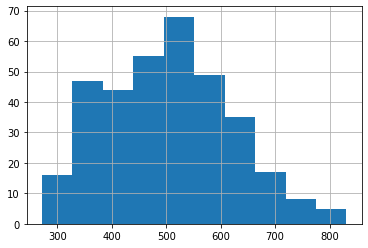

In [0]:
# Criar um histograma para a coluna hom_doloso
df.hom_doloso.hist();

* Podemos ver no nosso histograma, que a maior frequência está entre os 400 e 600 casos. 

* Temos uma queda na frequência de casos a partir de 650. O que significa que temos bem menos frequência de mais de 650 casos nos meses.

### **5.2 - Gráfico de Linhas para Homicídios dolosos e Tentativa de Homicídios**

* Vamos verificar agora, graficamente, a tendência de queda da variável Homicídios Dolosos e a tendência de crescimento da variável Tentativa de Homicídios.

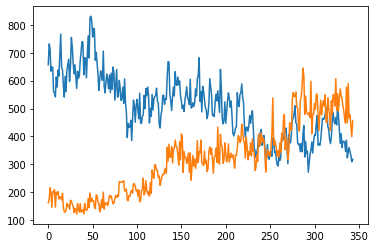

In [0]:
# Plotar um gráfico de linhas comparando `hom_doloso` e `tentat_hom`
df.hom_doloso.plot(kind="line");
df.tentat_hom.plot(kind="line");
plt.savefig('gráfico.png')

* A linha azul da variável hom_doloso e a linha laranja da variável tentat_hom, demonstram as tendências delas, a azul em queda e a laranja em crescimento.

### **5.3 - Gráfico de Linhas para a variável Roubo em coletivos**

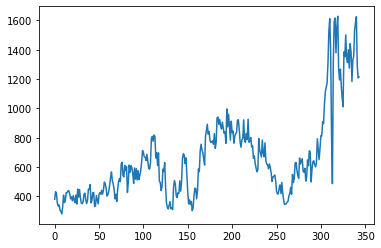

In [0]:
# Plotar um gráfico de linhas para a variável roubo_em_coletivo
df.roubo_em_coletivo.plot();
plt.savefig('roubocoletivo.png')

Temos alguns pontos interessantes nesse gráfico.

* Claramente vemos como os casos de roubo em coletivos, saiu da casa dos 400 casos mensais, para atualmente mais de 1200 casos, uma diferença enorme. 

* Podemos notar também que em certos períodos temos quedas bem grandes. Vemos no intervalo 100 - 150, temos duas grandes quedas. E que do intervalo 150 - 200, um aumento e uma constância, até a queda no final do intervalo 200 - 250. E a partir do intervalo 250 um grande aumento, com apenas uma grande queda.  


### **5.4 - Gráfico de linhas para a variável roubo de cargas**

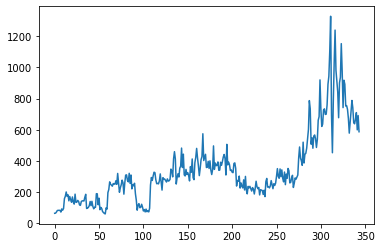

In [0]:
# Plotar um gráfico de linhas para a variável roubo_carga
df.roubo_carga.plot();

* O roubo de cargas, assim como roubo em coletivos, também teve um grande aumento de casos com o passar dos anos. Mesmo que agora apresente uma tendência de queda, os casos estão na casa dos 600 por mês.

## **6 - Conclusão**

Após uma análise exploratória dos dados sobre a violência no Rio de Janeiro, chegamos a algumas conclusões.

* O roubo de carga e em coletivos, trazem números alarmantes para o povo. Com um grande diferença do início da coleta dos dados, até o dia de hoje.

* Outro caso interessante é o roubo de veículos, que tem uma média acima do roubo de celulares. Para descobrir, com certeza, a razão para tal, nos precisamos de mais dados, mas é no mínimo, curioso.

* Os casos de homicídios dolosos estão em queda no estado, outro dado também, no mínimo, curioso, que apenas com esse dataset não podemos concluir a razão. Mas é particularmente impressionante 7 das 9 entradas da década de 90, estarem com os maiores registros de homicídios dolosos, com 1995, liderando essa estatística com 8438 homicídios dolosos registrados. 

* Infelizmente notamos que ocorre uma correlação negativa entre homicídios dolosos e tentativas de homicídios, ja que nos anos que tivemos mais homicídios registrados foram os anos com menos tentativas de homicídios registradas, e vice-versa.

Vou deixar aqui meu [LinkedIn](https://www.linkedin.com/in/nelsontmiranda/), para quem tem interesse em data science, continuaria fazendo novos projetos e postando todo o notebook no meu repositório no [github](https://github.com/Nelsontmiranda/data_science). 